# Data Analysis and visualization

In [1]:
#import all the libraries that are needed for data manipulation

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
#import "covid.xlsx" to the jupyter notebook for manipulation
covid = pd.read_excel(r"covid.xlsx")
#convert to dataframe df for manipulation using pandas
df = pd.DataFrame(covid)
#output first 10 values of df to observe
print(df.head(10))

NameError: name 'pd' is not defined

In [3]:
#observe the data types and shape of the data frame df
df.describe
#observe characteristics of the columns
# df.cases.describe()
# df.deaths.describe()

<bound method NDFrame.describe of          dateRep  day  month  year  cases  deaths countriesAndTerritories  \
0     2020-04-24   24      4  2020    105       2             Afghanistan   
1     2020-04-23   23      4  2020     84       4             Afghanistan   
2     2020-04-22   22      4  2020     61       1             Afghanistan   
3     2020-04-21   21      4  2020     35       2             Afghanistan   
4     2020-04-20   20      4  2020     88       3             Afghanistan   
...          ...  ...    ...   ...    ...     ...                     ...   
12796 2020-03-25   25      3  2020      0       0                Zimbabwe   
12797 2020-03-24   24      3  2020      0       1                Zimbabwe   
12798 2020-03-23   23      3  2020      0       0                Zimbabwe   
12799 2020-03-22   22      3  2020      1       0                Zimbabwe   
12800 2020-03-21   21      3  2020      1       0                Zimbabwe   

      geoId countryterritoryCode  popData

In [4]:
#observe characteristics of the columns
df.cases.describe()

count    12801.000000
mean       208.431763
std       1488.808879
min         -9.000000
25%          0.000000
50%          1.000000
75%         25.000000
max      37289.000000
Name: cases, dtype: float64

In [23]:
df.deaths.describe()

count    12801.000000
mean        14.861026
std        118.515802
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4928.000000
Name: deaths, dtype: float64

In [5]:
#look for empty rows and columns to perform data cleaning
pd.isnull(df)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
12796,False,False,False,False,False,False,False,False,False,False,False
12797,False,False,False,False,False,False,False,False,False,False,False
12798,False,False,False,False,False,False,False,False,False,False,False
12799,False,False,False,False,False,False,False,False,False,False,False


In [24]:
#group the Dataframe by continents 
# calculate total covid cases per continent
cases_per_continent = df.groupby('continentExp',)[['cases']].sum()

#sort the data in descending order

cases_per_continent.sort_values('cases', ascending = False)

cases_per_continent = pd.DataFrame(cases_per_continent)
#display total Covid deaths per continent
cases_per_continent.sort_values('cases', ascending = False)




,cases
continentExp,
Europe,1158623
America,1042525
Asia,431034
Africa,27221
Oceania,8036
Other,696


In [25]:
#determine total  Covid related deaths per continent from provided data
deaths_continent = df.groupby('continentExp',)[['deaths']].sum()

deaths_continent= pd.DataFrame(deaths_continent)


#sort the data in descending order
deaths_continent.sort_values('deaths', ascending = False)

#show the details of total covid relatede deahs per continent)


,deaths
continentExp,
Europe,113788
America,58917
Asia,16139
Africa,1286
Oceania,99
Other,7


                cases  deaths
continentExp                 
Africa          27221    1286
America       1042525   58917
Asia           431034   16139
Europe        1158623  113788
Oceania          8036      99
Other             696       7


Text(0.5, 1.0, 'Combined line chart of cases and deaths per continent')

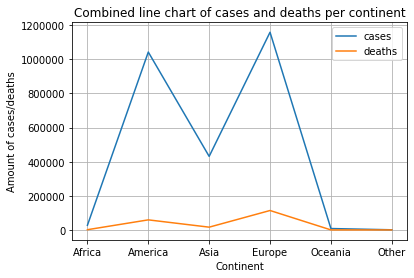

In [27]:
#merge the cases peer continent and deaths to find the total stats 

Total_stats =pd.merge(cases_per_continent, deaths_continent, how = 'right',left_on = 'continentExp', right_on= 'continentExp')
#Display the data
print(Total_stats)
#draw a graph
Total_stats.plot.line()
#insert Ylabel
plt.ylabel('Amount of cases/deaths')
#add Xlabel
plt.xlabel('Continent')
#add a grid
plt.grid()

#insert title
plt.title('Combined line chart of cases and deaths per continent')

Text(0.5, 1.0, 'Bar Graph of Covid Cases Per Continent and related fatalities')

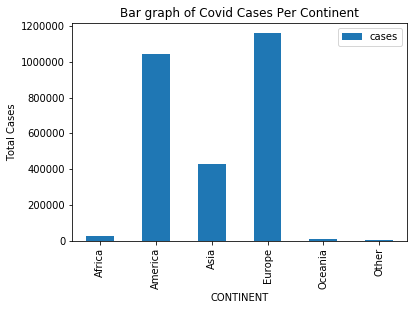

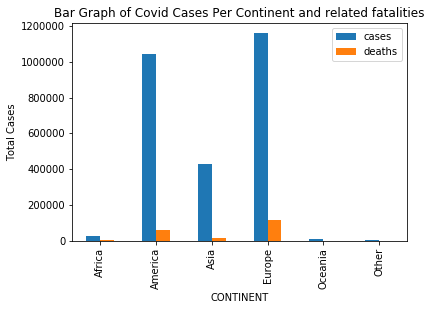

In [29]:
#plot bar graph of Ammount of covid cases against continents accoerding to data
cases_per_continent.plot.bar()
plt.title('Bar graph of Covid Cases Per Continent')
#set Xlabel and ylabel
plt.ylabel('Total Cases')
plt.xlabel('CONTINENT')

Total_stats.plot.bar()

#set Xlabel and ylabel
plt.ylabel('Total Cases')
plt.xlabel('CONTINENT')
# plt.grid()
#insert Title
plt.title('Bar Graph of Covid Cases Per Continent and related fatalities')



Text(0.5, 1.0, 'Europe cases by month')

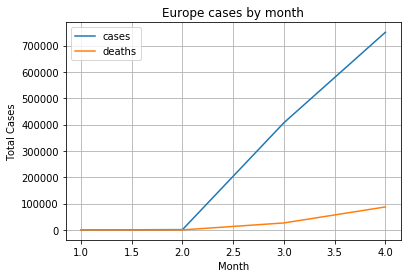

In [30]:
#to find case statistics In Europe per month from data 

#Filter Data to obtain only when continent is Europe
europe = df[df.continentExp == 'Europe']

#convert data to datframe
Europe = pd.DataFrame(europe, columns =['month', 'cases', 'deaths', 'countriesAndTerritories'])


#Group data by month to calculate total cases per month using sum()
summary = Europe.groupby('month').sum()
# summary.sort_values('cases', ascending = False)

#Display statistics of Europe
summary
summary = summary.drop([12], axis = 0)
summary.plot.line()
plt.ylabel('Total Cases')
plt.xlabel('Month')
plt.grid()
plt.title('Europe cases by month')

Text(0.5, 1.0, 'Continet cases by month')

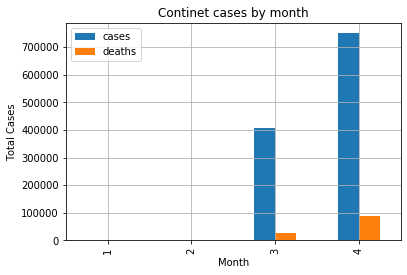

In [11]:
#Plot a bar graph for Europes cases by month
summary.plot.bar()


#set Xlabel and ylabel
plt.ylabel('Total Cases')
plt.xlabel('Month')
plt.grid()
plt.title('Continet cases by month')



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027A047F8C48>],
      dtype=object)

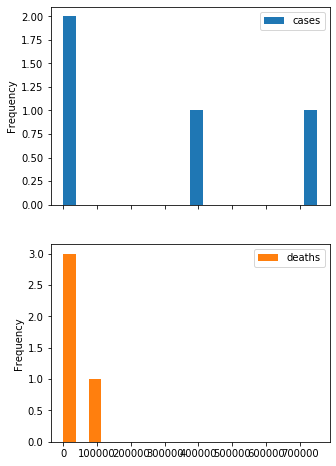

In [35]:
#plot histogram for Europe

summary.plot.hist(subplots=True, layout=(2,1), figsize=(5,8), bins=20)

In [12]:
#construct a dataframe named spain to hold data for spain

Spain =df[df.countriesAndTerritories == 'Spain']
Spain = pd.DataFrame(Spain, columns =['month','cases', 'deaths'])
Spain_stats =Spain.groupby('month')[['cases']].sum()

Spain_deaths =Spain.groupby('month')[['deaths']].sum()

# merge Spain deaths and spain stats to obtain a dataframe with both cases and deaths in spain
Spain_merge =pd.merge(Spain_stats, Spain_deaths, how = 'right',left_on = 'month', right_on= 'month')

#drop the unknown ro of month 12 and display the statistics of spain

Spain_merge= Spain_merge.drop([12], axis = 0)
Spain_merge 

,cases,deaths
month,,
1,0,0
2,34,0
3,85161,7340
4,127829,14817


Text(0.5, 1.0, 'Spains total cases by month')

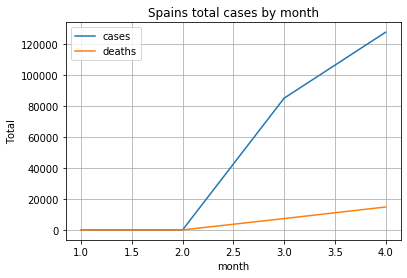

In [13]:
Spain_merge.plot.line()
plt.grid()
plt.ylabel('Total')
plt.title('Spains total cases by month')

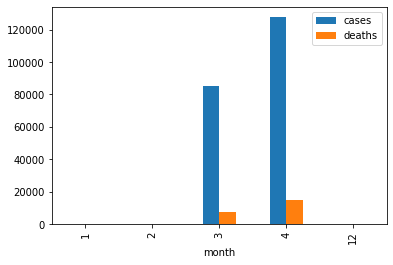

In [14]:
Spain =df[df.countriesAndTerritories == 'Spain']
Spain = pd.DataFrame(Spain, columns =['month','cases', 'deaths'])
Spain_stats =Spain.groupby('month')[['cases']].sum()
Spain_deaths =Spain.groupby('month')[['deaths']].sum()
Spain_merge =pd.merge(Spain_stats, Spain_deaths, how = 'right',left_on = 'month', right_on= 'month')
Spain_merge.plot(kind = 'bar')

In [15]:
# Italy
Italy =df[df.countriesAndTerritories == 'Italy']
Italy = pd.DataFrame(Italy, columns =['month','cases', 'deaths'])
Italy =Italy.groupby('month').sum()
Italy= Italy.drop([12], axis = 0)
Italy

,cases,deaths
month,,
1,3,0
2,885,21
3,100851,11570
4,88234,13958


Text(0, 0.5, 'Total')

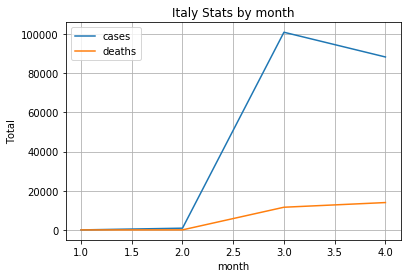

In [16]:
#plot a line chart for Italy
Italy.plot.line(title ='Italy Stats by month')
#insert labels and grid
plt.grid()
plt.ylabel('Total')

In [17]:
# Iran details.
Iran =df[df.countriesAndTerritories == 'Iran']
Iran = pd.DataFrame(Spain, columns =['month','cases', 'deaths'])
Iran =Iran.groupby('month').sum()
Iran

,cases,deaths
month,,
1,0,0
2,34,0
3,85161,7340
4,127829,14817
12,0,0


Text(0.5, 1.0, 'Iran Stats by month')

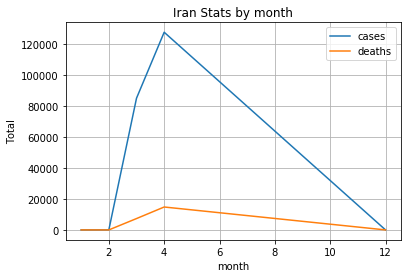

In [18]:
Iran.plot.line()
plt.grid()
plt.ylabel('Total')
plt.title('Iran Stats by month')

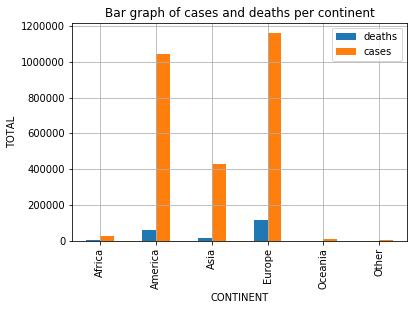

In [19]:
#input continent data in dataframe Df1
df1 = pd.DataFrame(df, columns =['continentExp',  'deaths', 'cases'])

#group by continent
summary = df1.groupby('continentExp').sum()
summary

#plot bar graph, label axes and add title
summary.plot(kind = 'bar')
plt.xlabel('CONTINENT')
plt.ylabel('TOTAL')
plt.title('Bar graph of cases and deaths per continent')
plt.grid()

In [42]:
#find country with the highest Corona Virus cases
# #sort in descending order and filter the first 10

Country_deaths= df.groupby('countriesAndTerritories')[['deaths']].sum()
l =Country_deaths.sort_values('deaths', ascending = False)[:10]
#The result outputs tthe countries with highest deaths
l


,deaths
countriesAndTerritories,
United_States_of_America,49963
Italy,25549
Spain,22157
France,21856
United_Kingdom,18738
Belgium,6490
Iran,5481
Germany,5321
China,4636


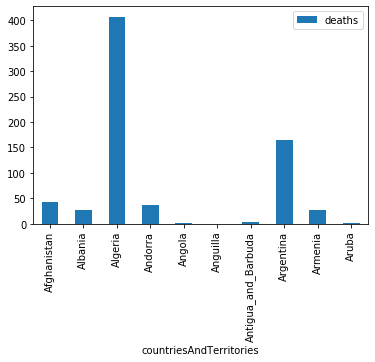

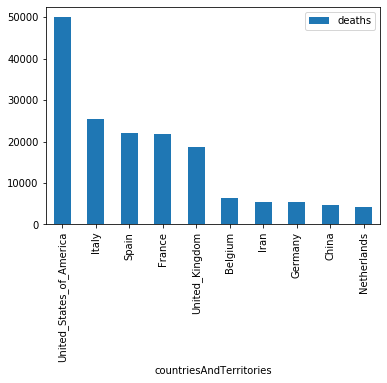

In [43]:
Country_deaths.head(10).plot.bar()
l.plot.bar()

In [21]:
#find country with highest cases

highest_cases= df.groupby('countriesAndTerritories')[['cases']].sum()
highest_cases.sort_values('cases', ascending = False)[:10]

,cases
countriesAndTerritories,
United_States_of_America,869172
Spain,213024
Italy,189973
Germany,150383
United_Kingdom,138078
France,120804
Turkey,101790
Iran,87026
China,83884


Text(0, 0.5, 'Related Deaths')

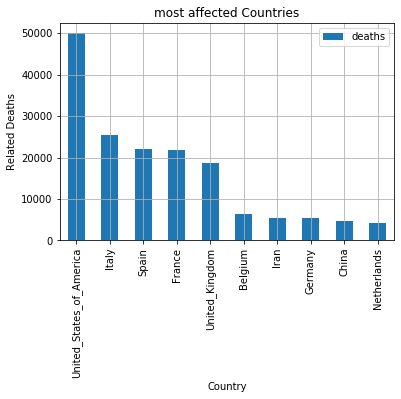

In [22]:
l.plot.bar()
plt.grid()
plt.title('most affected Countries')
plt.xlabel('Country')
plt.ylabel('Related Deaths')